In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [3]:
ethnicity = pd.read_csv(r'IPEDS_Dataset_Encoded/Fall Enrollment/EFA_2015-2020_data.csv', sep=',')


In [12]:
# eda_ethn = ethnicity[(ethnicity.efalevel =='All students total' )&(ethnicity.year == 2020)].set_index('unitid')
# eda_ethn.loc[:, 'other'] = eda_ethn[['ef2mort', "efunknt", "efunknt"]].sum(axis=1)
# eda_ethn = eda_ethn[['efwhitt', 'efbkaat', 'efhispt','efasiat',
#                      'other','efnhpit',  'efaiant'  ]]

# #ax =plt.axes()

# s = eda_ethn.sum(axis=1).sort_values(ascending=False)
# eda_ethn = eda_ethn.reindex(pd.DataFrame(s).index)


# ax =eda_ethn.head(40).plot(kind='bar', stacked=True, align='edge',figsize=(20, 10),)
# ax.xaxis.set_visible(True)
# ax.yaxis.set_visible(False)
# ax.title.set_text('ethnicity distribution of top 40 largest institutions')

# plt.tight_layout()
# print(eda_ethn.shape)




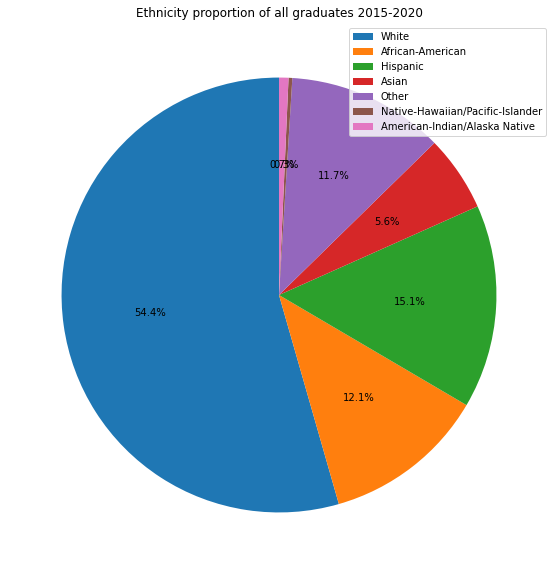

In [9]:
ethnicity = pd.read_csv(
    r'IPEDS_Dataset_Encoded/Fall Enrollment/EFA_2015-2020_data.csv', sep=',')
graduation_main = pd.read_csv(
    r'IPEDS_Dataset_Encoded/Graduation Rates/GR_2015-2021_data.csv', sep=',')

# drop the entries for column year == 2021
graduation = graduation_main.copy()
graduation = graduation[graduation['year'] != 2021]
# group by unitid and year
graduation = graduation.groupby(['unitid', 'year']).sum().reset_index()

graduation.loc[:, 'other'] = graduation[[
    'gr2mort', "grunknt", "grunknt"]].sum(axis=1)
graduation = graduation[['year', 'grtotlt', 'grwhitt', 'grbkaat', 'grhispt', 'grasiat',
                         'other', 'grnhpit',  'graiant']]

# sum everything per year
graduation = graduation.groupby(['year']).sum().reset_index()

# sum total of each column
graduation.loc['total', :] = graduation[['grtotlt', 'grwhitt', 'grbkaat',
                                         'grhispt', 'grasiat', 'other', 'grnhpit',  'graiant']].sum(axis=0)
# drop all rows except the last one
graduation = graduation.tail(1)


# drop year and grtotlt columns
graduation = graduation.drop(columns=['year', 'grtotlt'])
graduation = pd.DataFrame(graduation.T)
graduation

# plot the pie chart of the graduation
fig, ax = plt.subplots(figsize=(10, 10))
graduation.plot.pie(y=0, ax=ax, autopct='%1.1f%%',
                    startangle=90, shadow=False, legend=False, labels=None)
# change category labels
# set the legend
ax.legend(labels=['White', 'African-American', 'Hispanic', 'Asian', 'Other',
          'Native-Hawaiian/Pacific-Islander', 'American-Indian/Alaska Native'])
plt.title('Ethnicity proportion of all graduates 2015-2020')
plt.ylabel('')
plt.show()


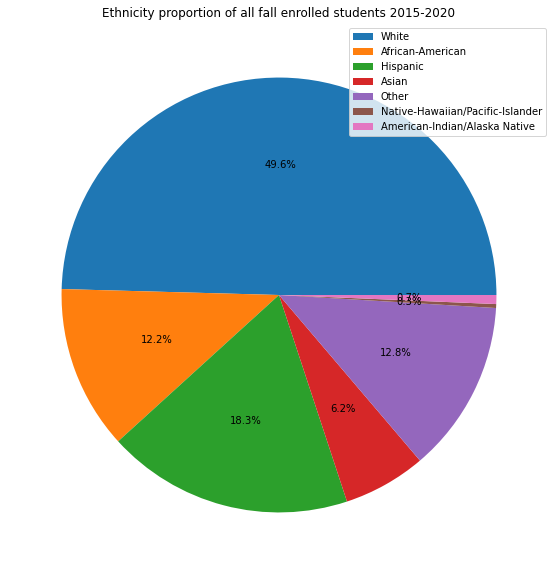

In [10]:
eda_ethn = ethnicity[(ethnicity.efalevel ==
                      'All students total')].set_index('unitid')

eda_ethn.loc[:, 'other'] = eda_ethn[[
    'ef2mort', "efunknt", "efunknt"]].sum(axis=1)
eda_ethn = eda_ethn[['efwhitt', 'efbkaat', 'efhispt', 'efasiat',
                     'other', 'efnhpit',  'efaiant']]
# compute the mean of each column
eda_ethn_mean = eda_ethn.mean(axis=0)
# compute the standard deviation of each column
eda_ethn_std = eda_ethn.std(axis=0)
# compute the z-score of each column
eda_ethn_z = (eda_ethn - eda_ethn_mean) / eda_ethn_std

# plot the pie chart of the eda_ethn_mean
plt.figure(figsize=(10, 10))
plt.pie(eda_ethn_mean, labels=None, autopct='%1.1f%%')
plt.title('Ethnicity proportion of all fall enrolled students 2015-2020')
plt.legend(labels=['White', 'African-American', 'Hispanic', 'Asian', 'Other',
           'Native-Hawaiian/Pacific-Islander', 'American-Indian/Alaska Native'])
# change label names of each category
plt.show()


(7739, 7)


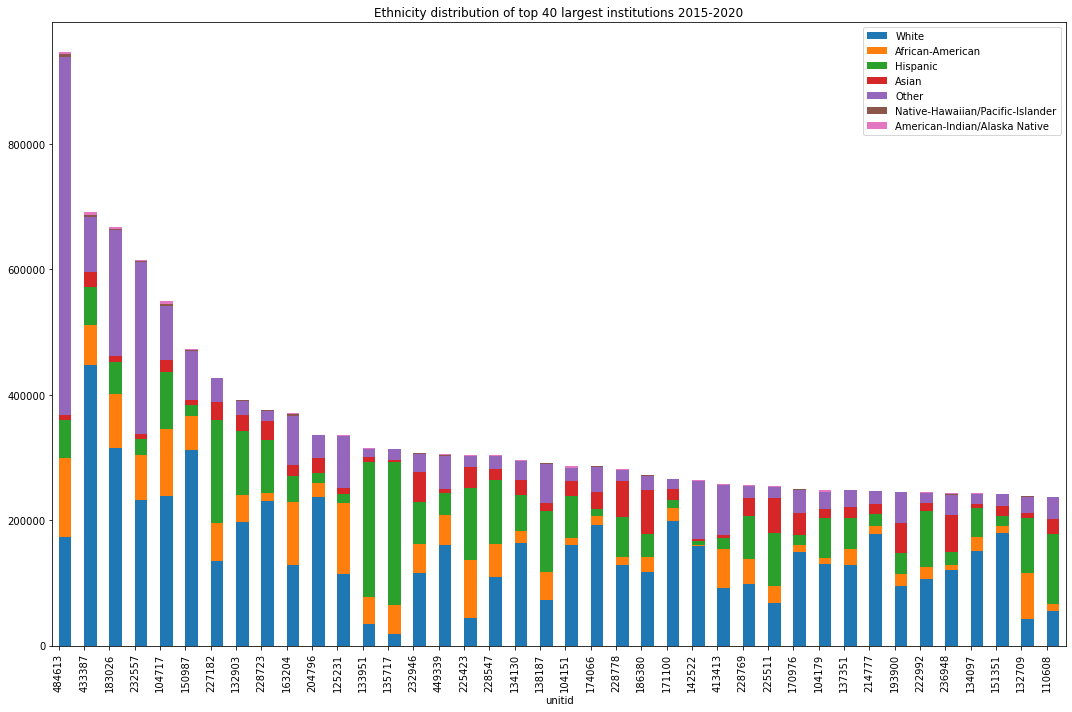

In [11]:
eda_ethn = ethnicity[(ethnicity.efalevel ==
                      'All students total')].set_index('unitid')
# group by year and sum values
eda_ethn = eda_ethn.groupby('unitid').sum()
eda_ethn.loc[:, 'other'] = eda_ethn[[
    'ef2mort', "efunknt", "efunknt"]].sum(axis=1)
eda_ethn = eda_ethn[['efwhitt', 'efbkaat', 'efhispt', 'efasiat',
                     'other', 'efnhpit',  'efaiant']]


s = eda_ethn.sum(axis=1).sort_values(ascending=False)
eda_ethn = eda_ethn.reindex(pd.DataFrame(s).index)


ax = eda_ethn.head(40).plot(kind='bar', stacked=True,
                            align='edge', figsize=(15, 10),)
#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.title.set_text(
    'Ethnicity distribution of top 40 largest institutions 2015-2020')
# change legend name
ax.legend(['White', 'African-American', 'Hispanic', 'Asian', 'Other',
          'Native-Hawaiian/Pacific-Islander', 'American-Indian/Alaska Native'])

plt.tight_layout()
print(eda_ethn.shape)
